# Twitter sentimental analysis

### What is twitter sentiment analysis?
Twitter sentiment analysis allows you to keep track of what's being said about your product or service on social media, and can help you detect angry customers or negative mentions before they they escalate

### What does tweets by sentiment mean?
In the context of a twitter sentiment analysis, at its simplest, sentiment analysis quantifies the mood of a tweet or comment by counting the number of positive and negative words. By subtracting the negative from the positive, the sentiment score is generated.

### Importing libraries

In [41]:
import pandas as pd   #used for data cleaning and analysis

import numpy as np   #used for working with arrays

import seaborn as sns   #used for data visualization and exploratory data analysis

### importing the dataset

In [42]:
path = 'sentiment_tweets3.csv'

In [43]:
df = pd.read_csv(path)  #read_csv used for Load the CSV into a DataFrame

### df.info()
The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [44]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


### df.head()
 Returns the first 5 rows of the dataframe

In [45]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


### df.tail()
Returns the last 5 rows of the dataframe

In [46]:
df.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


In [47]:
df['label (depression result)'].value_counts()  #value_counts() function returns object containing counts of unique values

0    8000
1    2314
Name: label (depression result), dtype: int64

In [48]:
df.loc[1234]['message to examine']  #loc attribute access a group of rows and columns by label(s) 

'@dsthestar1121 Last night was FUN!!! Well this morning.  lol.  See ya Saturday- get ready to REALLY party!  '

### isnull().sum()
isnull().sum() used for returns the number of missing values in the data set. 

In [49]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

for checking is there is any number in the tweets 

In [50]:
for i in df['message to examine']:
    for j in i.split():        #The split() method splits a string into a list.
        if j.isdigit():        #The isdigit() method returns True if all the characters are digits, otherwise False
            s= "yes"
        else:
            s= "no"
print(s)    

yes


## What is Text Processing ?
   Whenever we have textual data, we need to apply several pre-processing steps to the data to transform words into numerical features that work with machine learning algorithms. The pre-processing steps for a problem depend mainly on the domain and the problem itself.From here we have to filter the tweets and remove the unnecessary part from the tweet.

### Text Preprocessing

- Lowercasing all the tweets.
- Romoval of punctuations
- Removal of Stopwords
- Lemmatization

### Remove numbers
Removing unwanted numbers from the tweets.




In [51]:
import re    #re(Regular expressions) can be used to check if a string contains the specified search pattern.

In [52]:
def remove_numbers(text):
    return ' '.join([i for i in str(text).split() if not i.isdigit()])

df['clean_tweets'] = df['message to examine'].apply(lambda x:remove_numbers(x))

In [53]:
df

,Index,message to examine,label (depression result),clean_tweets
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...


### lowercasing all the tweets
lower() method returns the lowercase string from the given string. It converts all uppercase characters to lowercase.

In [54]:
df['clean_tweets'] = df['clean_tweets'].str.lower()

df

,Index,message to examine,label (depression result),clean_tweets
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder
...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...


### Remove Weblinks
re.sub() :- sub() function belongs to the Regular Expressions ( re ) module in Python. It returns a string where all matching occurrences of the specified pattern are replaced by the replace string. Here we use "white space" to replace the web links.

In [55]:
def remove_weblinks(text):
    return re.sub(r"http\S+", "", text)

df['clean_tweets2'] = df['clean_tweets'].apply(lambda x: remove_weblinks(x))

In [56]:
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder
...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...


### Remove Twitter Mentions
Here also we use re.sub() fuction. And replace the twitter mentions with "white space".

In [57]:
def remove_twitter(text):
    return re.sub('@[\w]+','',text)

df['clean_tweets3'] = df['clean_tweets2'].apply(lambda x: remove_twitter(x))

In [58]:
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder
...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...


### Removal of Punctuations
This program removes all punctuations from a string.We will check each character of the string and if the character is a punctuation, empty string is assigned to it.

In [59]:
import string   #Python String module contains some constants, utility function, and classes for string manipulation.

In [60]:
PUNCT_TO_REMOVE = string.punctuation   ##string.punctuation will give the all sets of punctuation.

In [61]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','', PUNCT_TO_REMOVE))   

#The maketrans() method returns a mapping table that can be used with the translate() method to replace specified characters.


In [62]:
df['clean_tweets4'] = df['clean_tweets3'].apply(lambda x: remove_punctuation(x))

df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder
...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...


### Removal of Stopwords
 One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data),  are referred to as stop words. Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”).for this, we can remove them easily, by storing a list of words that you consider to stop word."NLTK"(Natural Language Toolkit) 
 in python has a list of stopwords stored in 16 different languages..

### NLTK
NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP. A lot of the data that you could be analyzing is unstructured data and contains human-readable text.

In [63]:
import nltk
nltk.download('stopwords')   #downloading stopword package form NLTK

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english')) #importing stopword from english language

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [65]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['clean_tweets5'] = df['clean_tweets4'].apply(lambda x: remove_stopwords(x))

In [66]:
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em


### Frequent Words
 list out the frequently used words form the tweets


In [67]:
from collections import Counter
cnt = Counter()   #Python Counter tool, you can count the key-value pairs in an object.

for text in df['clean_tweets5'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('depression', 2285),
 ('im', 1039),
 ('good', 686),
 ('day', 558),
 ('like', 553),
 ('love', 551),
 ('get', 484),
 ('dont', 408),
 ('lol', 404),
 ('know', 403)]

Since, this is a sentiment analysis, depression word is important for sentiment analysis, let's keep this as it is.

### Rare words
list out the rarely used words form the tweets

In [68]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

{'bharatu',
 'dolls',
 'gteens',
 'herbo',
 'nagging',
 'persistent',
 'pictwittercomhmcwffkyu7',
 'pictwittercomqggbqpzumr',
 'provoking',
 'succumbs'}

### Remove the rarely used words


In [69]:
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df['clean_tweets6'] = df['clean_tweets5'].apply(lambda x: remove_rarewords(x))


In [70]:
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depression g mood im done stressing people don...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depression brain makes feel like youll never e...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamine nasal spray shows promise depression ...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em


### Lemmatization
Lemmatization with NLTK. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [71]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avish\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [72]:
from nltk.corpus import wordnet  #wordnet is a large word database of English Nouns, Adjectives, Adverbs and Verbs
from nltk.stem import WordNetLemmatizer  

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df['clean_tweets6'].apply(lambda text: lemmatize_words(text))

In [73]:
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depression g mood im done stressing people don...,depression g mood im do stress people dont des...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depression brain makes feel like youll never e...,depression brain make feel like youll never en...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamine nasal spray shows promise depression ...,ketamine nasal spray show promise depression s...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em


### Replace some short words

I see some of the short words like dont, im. I've just used most frequent words used based on my knowledge, you can add up.

In [74]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [75]:
def replace_short_words(text):
  for word in text.split():  #here use text.split() method to seperate tweets into texts and use "for loop" to check all the text.
    if word in short_words:
      text = text.replace(word, short_words[word])
  
  return text

In [76]:
df["clean_tweets7"] = df['text_lemmatized'].apply(lambda text: replace_short_words(text))

df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized,clean_tweets7
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,,,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...,need send them accountant tomorrow oddly was n...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depression g mood im done stressing people don...,depression g mood im do stress people dont des...,depression g mood I am do stress people do not...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depression brain makes feel like youll never e...,depression brain make feel like youll never en...,depression brain make feel like youll never en...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamine nasal spray shows promise depression ...,ketamine nasal spray show promise depression s...,ketamine nasal spray show promise depression s...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em,do not mistake bad day depression everyone them


Our text is clean and ready for training. But let's delete all the previous columns.

In [77]:
xdf = df[['Index','label (depression result)','clean_tweets7']]

xdf

,Index,label (depression result),clean_tweets7
0,106,0,real good moment miss much
1,217,0,read manga
2,220,0,
3,288,0,need send them accountant tomorrow oddly was n...
4,540,0,add myspace myspacecomlookthunder
...,...,...,...
10309,802309,1,depression g mood I am do stress people do not...
10310,802310,1,depression brain make feel like youll never en...
10311,802311,1,ketamine nasal spray show promise depression s...
10312,802312,1,do not mistake bad day depression everyone them


Here we change the column names as simplest

In [78]:
xdf.columns = ['Index','Labels','Tweets']

xdf

,Index,Labels,Tweets
0,106,0,real good moment miss much
1,217,0,read manga
2,220,0,
3,288,0,need send them accountant tomorrow oddly was n...
4,540,0,add myspace myspacecomlookthunder
...,...,...,...
10309,802309,1,depression g mood I am do stress people do not...
10310,802310,1,depression brain make feel like youll never en...
10311,802311,1,ketamine nasal spray show promise depression s...
10312,802312,1,do not mistake bad day depression everyone them


### Save to directory
save the cleaned data into a file directory

In [79]:
xdf.to_csv(r'C:\Users\avish\clean_data_1.csv')

## Preprocessing

 

### sklearn(Scikit-learn) library
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.




### Why is TfidfVectorizer used?
In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
cv = TfidfVectorizer()

In [82]:
tfidf = cv.fit_transform(xdf['Tweets'])

## Splitting Dataset

### What is from Sklearn Model_selection import train_test_split?
train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, xdf['Labels'], test_size = 0.2)

Above line we use "train_test_split" function to divide the dataset, 'test_size = 0.2' means testing data contains 20% and 
training data contains 80% of data. 

In [85]:
tfX_train

<8251x15365 sparse matrix of type '<class 'numpy.float64'>'
	with 65852 stored elements in Compressed Sparse Row format>

In [224]:
tfX_train.shape #where the first dimension indexes the image and the second indexes the pixel in each image

(8251, 15365)

In [86]:
tfX_test.shape

(2063, 15365)

## Models and Evaluation

### What is MultinomialNB?
What is the Multinomial Naive Bayes algorithm? Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email.

In [225]:
from sklearn.naive_bayes import MultinomialNB

In [226]:
mnb = MultinomialNB()

In [227]:
mnb.fit(tfX_train, tfy_train)

MultinomialNB()

### sklearn metrics confusion_matrix`
sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None)[source] Compute confusion matrix to evaluate the accuracy of a classification. A confusion matrix is such that is equal to the number of observations known to be in group but predicted to be in group

### sklearn metrics accuracy_score
accuracy_score function of the sklearn. metrics package calculates the accuracy score for a set of predicted labels against the true labels.

In [228]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(tfX_test)   

print(f'Accuracy test score is : {accuracy_score(tfy_test, y_pred_mnb)}')

Accuracy test score is : 0.9064469219583131


In [229]:
y_pred_mnb_1 = mnb.predict(tfX_train)

print(f'Accuracy train score is : {accuracy_score(tfy_train, y_pred_mnb_1)}')

Accuracy train score is : 0.9340685977457278


In [232]:
cf_test= confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0]) 

#The matrix compares the actual target values with those predicted by the machine learning model.

cf_test

array([[ 270,  189],
       [   4, 1600]], dtype=int64)

In [233]:
cf_train= confusion_matrix(tfy_train, y_pred_mnb_1, labels = [1,0]) 

#The matrix compares the actual target values with those predicted by the machine learning model.

cf_train

array([[1311,  544],
       [   0, 6396]], dtype=int64)

# Visualization

visualizing data in Python using Matplotlib, Pandas and Seaborn. Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends, and correlations that might not otherwise be detected can be exposed

## matplotlib.pyplot

Matplotlib is one of the most popular Python packages used for data visualization

Pyplot is a collection of functions in the popular visualization package Matplotlib. Its functions manipulate elements of a figure, such as creating a figure, creating a plotting area, plotting lines, adding plot labels, etc

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns   ##used for data visualization and exploratory data analysis

### testing data

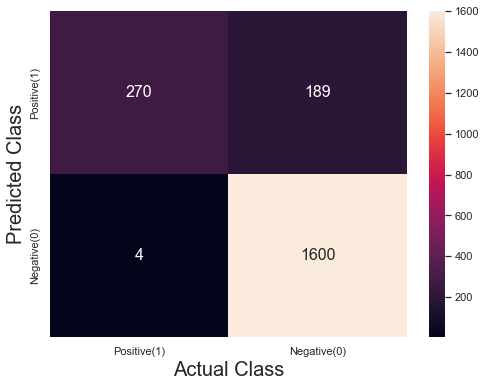

In [235]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf_test, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()


TP(True positive)  - Plum color showing that test case, meaning they have positive texts only

TN(True negative)  - Bisque color showing that test case , meaning they have negative texts only

FP(False positive) - Eggplant color showing that test case misclassified as positive but actually they are negative.

FN(False negative) - Black color showing that test case misclassified as negative but actually they are positive.


### Training data

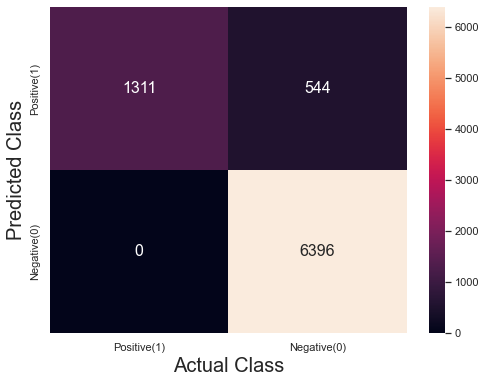

In [236]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf_train, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

TP(True positive) - Plum color showing that test case, meaning they have positive texts only

TN(True negative) - Bisque color showing that test case , meaning they have negative texts only

FP(False positive) - Eggplant color showing that test case misclassified as positive but actually they are negative.

FN(False negative) - Black color showing that test case misclassified as negative but actually they are positive

## Histogram method of graphical representation

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.


### Testing data

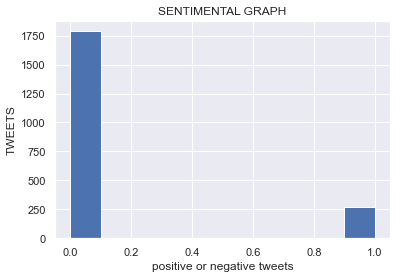

In [238]:
plt.hist(y_pred_mnb)
plt.title("SENTIMENTAL GRAPH")
plt.xlabel("positive or negative tweets")
plt.ylabel("TWEETS")
plt.grid(True)
plt.show()


test case data of histogram shows that around 86% of negative tweets and around 14% of positive tweets.

### Training data

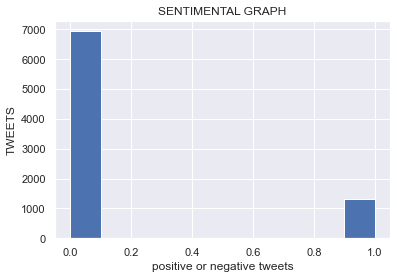

In [239]:
plt.hist(y_pred_mnb_1)
plt.title("SENTIMENTAL GRAPH")
plt.xlabel("positive or negative tweets")
plt.ylabel("TWEETS")
plt.grid(True)
plt.show()

test case data of histogram shows that around 85% of negative tweets and around 15% of positive tweets.

# Conclusion

In this project we tried to show the basic way of classifying tweets into positive or
negative category using Naive Bayes as baseline and how language models are related to the
Naive Bayes and can produce better results.

 - Both classifiers achieve the best results when using the features of the TfidfVectorizer

 - Using the Sklearn Models and Visualizations we reached out the a conclusion that, The twitter data is mostly produce the     negative attitude or spreading negative thoughts.